In [1]:

# python scripts/plot/integrate_metrics.py --output cellbender
# python scripts/plot/integrate_metrics.py --output cellranger

import scanpy as sc
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_samples
import seaborn as sns

import matplotlib.pyplot as plt
from pathlib import Path
import os

# set up relative paths within the project
current_folder = globals()['_dh'][0]
input_path_merged = current_folder / ".." / ".." / "data" / "prc" / "sc" / "cellbender_merged.h5ad"
input_path_integrated = current_folder / ".." / ".." / "data" / "prc" / "sc" / "cellbender_integrated.h5ad"

resolution = 0.5

AnnData object with n_obs × n_vars = 140896 × 3000
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet', 'diss_score', 'patient_id', 'sample_id', 'Condition', 'lesion_type', 'Age', 'Sex', 'RIN', 'Batch', 'visium', 'snRNA-seq', 'batch', 'leiden'
    var: 'highly_variable', 'highly_variable_nbatches', 'mean', 'std'
    uns: 'hvg', 'log1p', 'neighbors', 'pca', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'
['CO37' 'CO40' 'CO41' 'CO45' 'CO74' 'CO85' 'MS197' 'MS229' 'MS371N'
 'MS377I' 'MS377N' 'MS377T' 'MS411' 'MS466' 'MS497I' 'MS497T' 'MS549H'
 'MS549T' 'MS586']
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15'
 '16' '17' '18' '19' '20' '21' '22' '23' '24']


/Users/pschafer/miniconda3/envs/torch_env/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/pschafer/miniconda3/envs/torch_env/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/pschafer/miniconda3/envs/torch_env/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/pschafer/miniconda3/envs/torch_env/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/pschafer/miniconda3/envs/torch_env/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/pschafer/miniconda3/envs/torch_env/lib/python3.8/

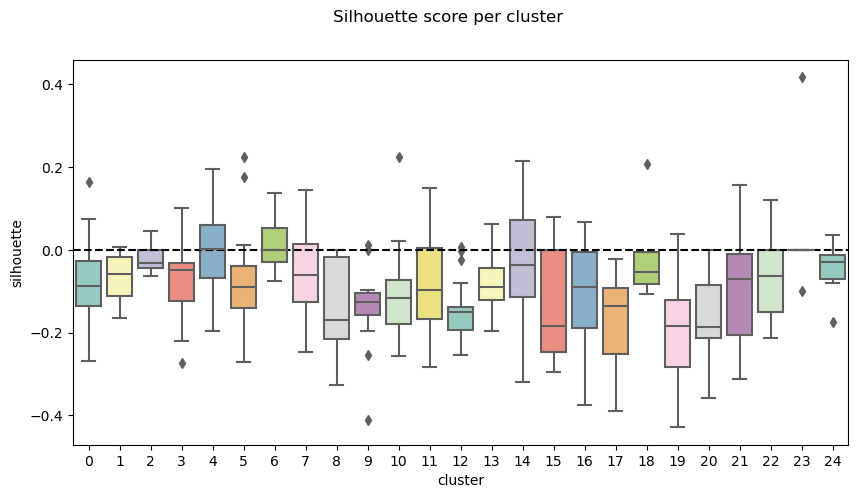

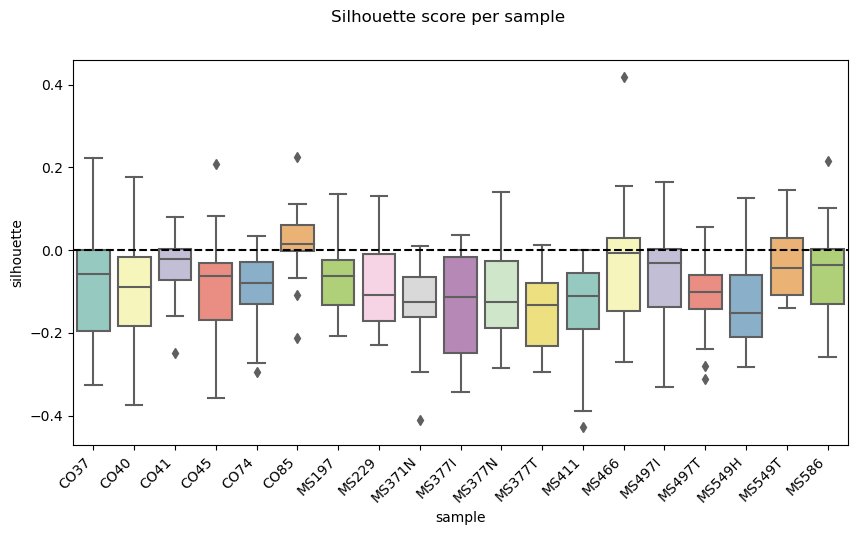

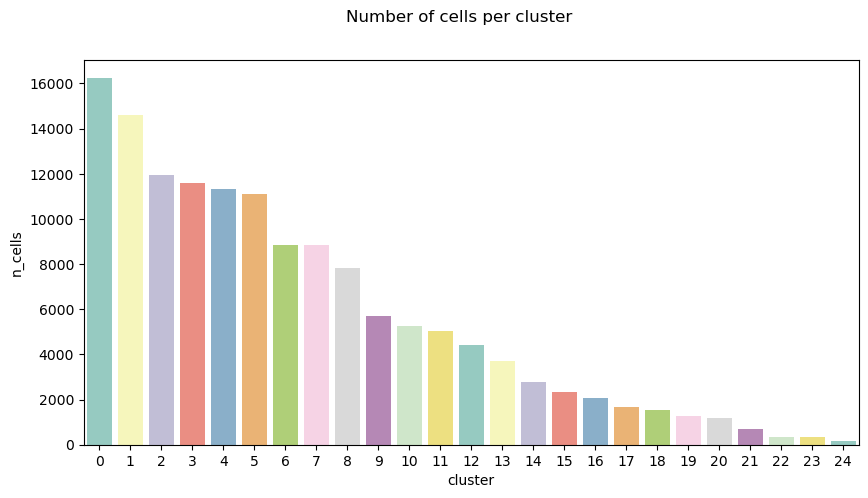

In [5]:
adata_merged = sc.read_h5ad(input_path_merged)
sc.tl.leiden(adata_merged, resolution=resolution, key_added="leiden")
print(adata_merged)

samples = np.unique(adata_merged.obs['sample_id'])
print(samples)

clusters = np.array([str(s) for s in range(0, np.max(np.unique(adata_merged.obs.leiden).astype(int)) + 1)])
print(clusters)

df_list = []
for c in clusters:
    adata_subset = adata_merged[adata_merged.obs.leiden == c, :]
    sample_silhouette_values = silhouette_samples(adata_subset.obsm["X_pca"], adata_subset.obs.sample_id, metric="euclidean")
    for sample in samples:
        np.mean(sample_silhouette_values[adata_subset.obs.sample_id==sample])
        # make dataframe with mean
        df_list.append(pd.DataFrame({"cluster": c, "sample": sample, "silhouette": np.mean(sample_silhouette_values[adata_subset.obs.sample_id==sample])}, index=[0]))
df = pd.concat(df_list)

fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.boxplot(x="cluster", y="silhouette", data=df, palette="Set3")
ax.axhline(y=0, color='black', linestyle='--')
plt.suptitle("Silhouette score per cluster")
plt.show()

fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.boxplot(x="sample", y="silhouette", data=df, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.axhline(y=0, color='black', linestyle='--')
plt.suptitle("Silhouette score per sample")
plt.show()

df_2 = pd.DataFrame({"cluster": adata_merged.obs.leiden.value_counts().index, "n_cells": adata_merged.obs.leiden.value_counts().values})
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x="cluster", y="n_cells", data=df_2, palette="Set3")
plt.suptitle("Number of cells per cluster")
plt.show()

AnnData object with n_obs × n_vars = 140896 × 3000
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet', 'diss_score', 'patient_id', 'sample_id', 'Condition', 'lesion_type', 'Age', 'Sex', 'RIN', 'Batch', 'visium', 'snRNA-seq', 'batch', 'leiden'
    var: 'highly_variable', 'highly_variable_nbatches', 'mean', 'std'
    uns: 'hvg', 'log1p', 'neighbors', 'pca', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'
['CO37' 'CO40' 'CO41' 'CO45' 'CO74' 'CO85' 'MS197' 'MS229' 'MS371N'
 'MS377I' 'MS377N' 'MS377T' 'MS411' 'MS466' 'MS497I' 'MS497T' 'MS549H'
 'MS549T' 'MS586']
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15'
 '16' '17' '18']


/Users/pschafer/miniconda3/envs/torch_env/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/pschafer/miniconda3/envs/torch_env/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/pschafer/miniconda3/envs/torch_env/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/pschafer/miniconda3/envs/torch_env/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/pschafer/miniconda3/envs/torch_env/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/pschafer/miniconda3/envs/torch_env/lib/python3.8/

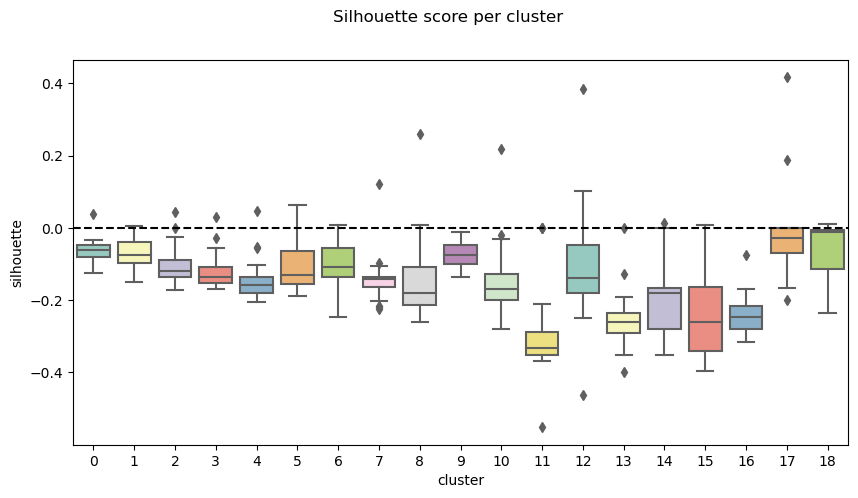

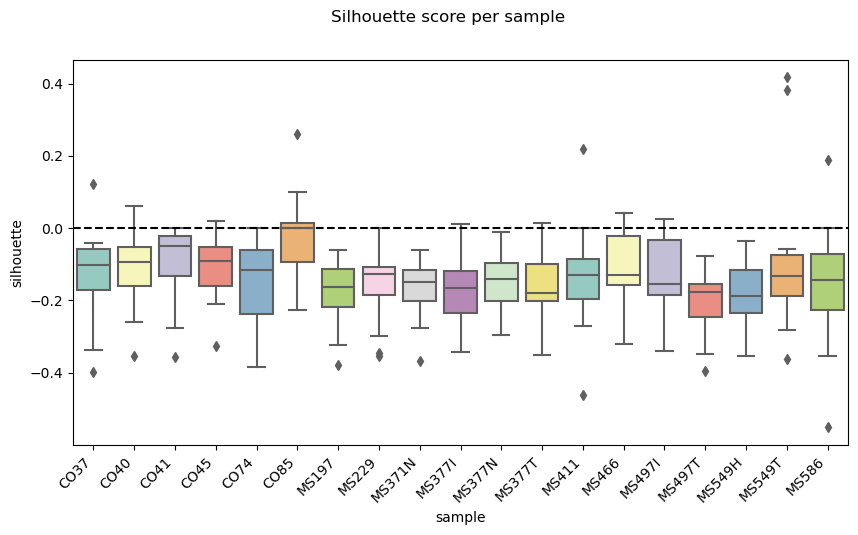

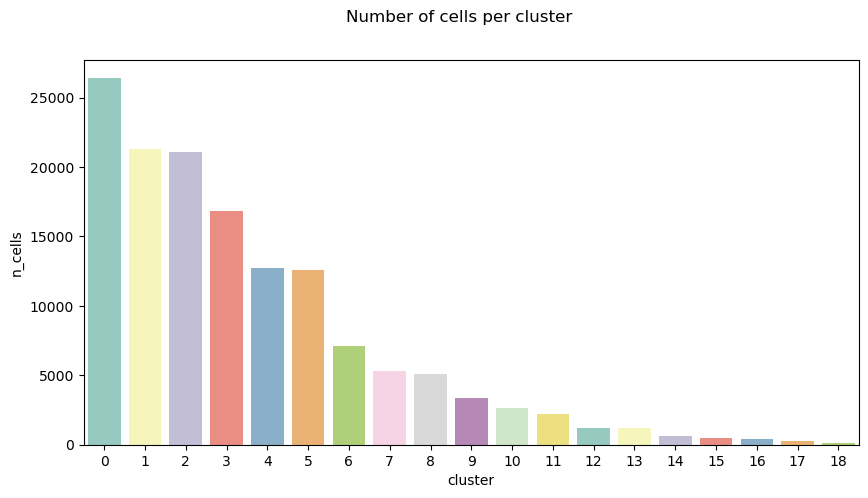

In [6]:
adata_integration = sc.read_h5ad(input_path_integrated)
sc.tl.leiden(adata_integration, resolution=resolution, key_added="leiden")
print(adata_integration)

samples = np.unique(adata_integration.obs['sample_id'])
print(samples)

clusters = np.array([str(s) for s in range(0, np.max(np.unique(adata_integration.obs.leiden).astype(int)) + 1)])
print(clusters)

df_list = []
for c in clusters:
    adata_subset = adata_integration[adata_integration.obs.leiden == c, :]
    sample_silhouette_values = silhouette_samples(adata_subset.obsm["X_pca"], adata_subset.obs.sample_id, metric="euclidean")
    for sample in samples:
        np.mean(sample_silhouette_values[adata_subset.obs.sample_id==sample])
        # make dataframe with mean
        df_list.append(pd.DataFrame({"cluster": c, "sample": sample, "silhouette": np.mean(sample_silhouette_values[adata_subset.obs.sample_id==sample])}, index=[0]))
df = pd.concat(df_list)

fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.boxplot(x="cluster", y="silhouette", data=df, palette="Set3")
ax.axhline(y=0, color='black', linestyle='--')
plt.suptitle("Silhouette score per cluster")
plt.show()

fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.boxplot(x="sample", y="silhouette", data=df, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.axhline(y=0, color='black', linestyle='--')
plt.suptitle("Silhouette score per sample")
plt.show()

df_2 = pd.DataFrame({"cluster": adata_integration.obs.leiden.value_counts().index, "n_cells": adata_integration.obs.leiden.value_counts().values})
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x="cluster", y="n_cells", data=df_2, palette="Set3")
plt.suptitle("Number of cells per cluster")
plt.show()

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15'
 '16' '17' '18']


/Users/pschafer/miniconda3/envs/torch_env/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/pschafer/miniconda3/envs/torch_env/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/pschafer/miniconda3/envs/torch_env/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/pschafer/miniconda3/envs/torch_env/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/pschafer/miniconda3/envs/torch_env/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/pschafer/miniconda3/envs/torch_env/lib/python3.8/

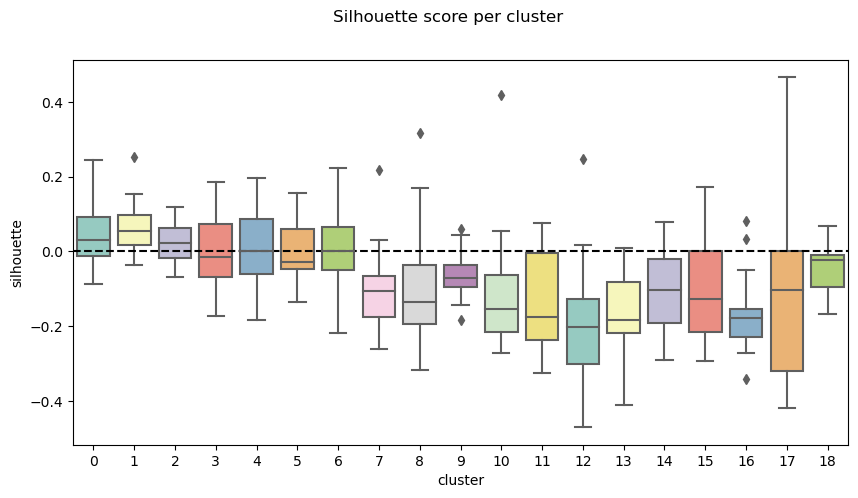

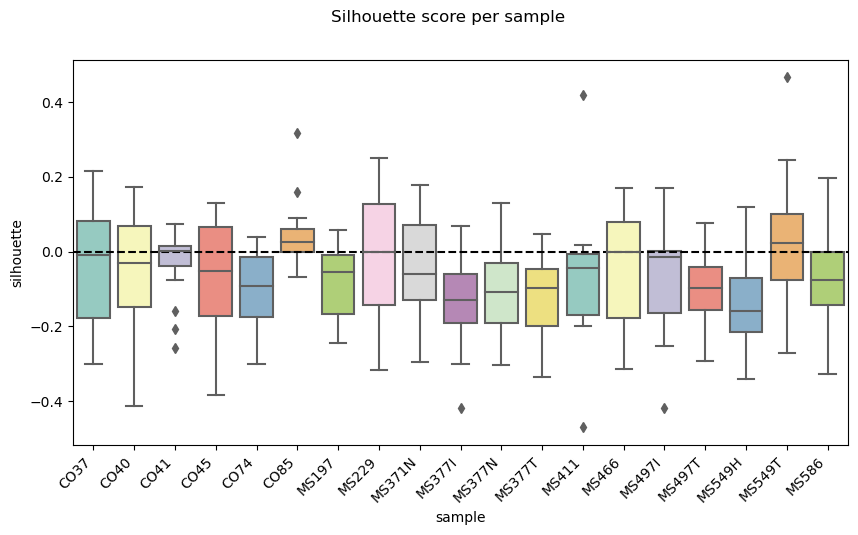

In [7]:
clusters = np.array([str(s) for s in range(0, np.max(np.unique(adata_integration.obs.leiden).astype(int)) + 1)])
print(clusters)

df_list = []
for c in clusters:
    adata_subset = adata_merged[adata_integration.obs.leiden == c, :]
    sample_silhouette_values = silhouette_samples(adata_subset.obsm["X_pca"], adata_subset.obs.sample_id, metric="euclidean")
    for sample in samples:
        np.mean(sample_silhouette_values[adata_subset.obs.sample_id==sample])
        # make dataframe with mean
        df_list.append(pd.DataFrame({"cluster": c, "sample": sample, "silhouette": np.mean(sample_silhouette_values[adata_subset.obs.sample_id==sample])}, index=[0]))
df = pd.concat(df_list)

fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.boxplot(x="cluster", y="silhouette", data=df, palette="Set3")
ax.axhline(y=0, color='black', linestyle='--')
plt.suptitle("Silhouette score per cluster")
plt.show()

fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.boxplot(x="sample", y="silhouette", data=df, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.axhline(y=0, color='black', linestyle='--')
plt.suptitle("Silhouette score per sample")
plt.show()